# Classification

importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:

!pip install catboost

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## merging datasets

In [ ]:
df = pd.read_csv('/content/htmlDataset.csv')
df.shape

(14640, 36)

In [ ]:
nan_count_result = df['result'].isna().sum()
print("Number of NaN values in 'result' column:", nan_count_result)


Number of NaN values in 'result' column: 10735


In [ ]:
data = df.dropna(subset=['result'])
data.shape

(3905, 36)

In [ ]:
count_zeros = (data['result'] == 0).sum()
print("Number of rows with '0' in 'result' column:", count_zeros)


Number of rows with '0' in 'result' column: 2551


In [ ]:
count_ones = (data['result'] == 1).sum()
print("Number of rows with '0' in 'result' column:", count_ones)

Number of rows with '0' in 'result' column: 1354


In [ ]:
columns_to_drop = []
for column in data.columns:
  if data[column].sum() == 0 or data[column].isnull().all():
    columns_to_drop.append(column)


print("columns to drop", columns_to_drop)

columns to drop ['num_special_chars', 'num_subdomains', 'has_https', 'suspicious_url']


In [ ]:
print(data.columns)
print(data.shape)

Index(['filename', 'url_length', 'num_dots_in_url', 'num_special_chars',
       'num_subdomains', 'num_forms', 'num_inputs', 'num_password_fields',
       'num_external_links', 'num_internal_links', 'num_hidden_fields',
       'num_mailto_links', 'num_scripts', 'num_js_functions', 'has_eval_js',
       'has_escape_js', 'has_unescape_js', 'has_settimeout_js',
       'has_setinterval_js', 'has_https', 'suspicious_url', 'num_meta_tags',
       'num_refresh_meta', 'num_iframes', 'num_hidden_iframes', 'num_images',
       'num_images_with_suspicious_url', 'num_style_tags', 'num_inline_styles',
       'num_onload_attributes', 'num_onerror_attributes',
       'num_external_form_actions', 'rec_id', 'url', 'result', 'created_date'],
      dtype='object')
(3905, 36)


In [ ]:
columns_not_reqd = ['filename','rec_id', 'url', 'created_date','num_special_chars', 'num_subdomains', 'has_https', 'suspicious_url']

In [ ]:
data_cleaned = data.drop(columns=columns_not_reqd)
data_cleaned.shape

(3905, 28)

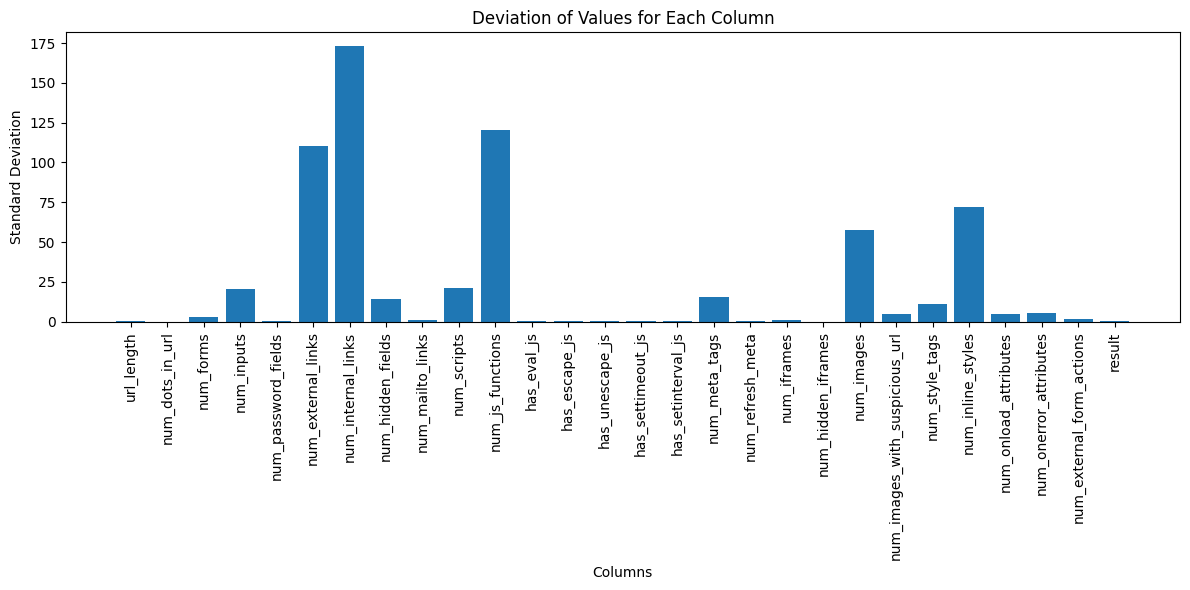

In [ ]:
means = data_cleaned.mean()
stds = data_cleaned.std()

plt.figure(figsize=(12, 6))
plt.bar(means.index, stds)
plt.xlabel('Columns')
plt.ylabel('Standard Deviation')
plt.title('Deviation of Values for Each Column')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


##Splitting the dataset and standardization

In [ ]:
X = data_cleaned.drop('result', axis=1)
y = data_cleaned['result']

In [ ]:
X.shape

(3905, 27)

In [ ]:
feature_names = X.columns
feature_names

Index(['url_length', 'num_dots_in_url', 'num_forms', 'num_inputs',
       'num_password_fields', 'num_external_links', 'num_internal_links',
       'num_hidden_fields', 'num_mailto_links', 'num_scripts',
       'num_js_functions', 'has_eval_js', 'has_escape_js', 'has_unescape_js',
       'has_settimeout_js', 'has_setinterval_js', 'num_meta_tags',
       'num_refresh_meta', 'num_iframes', 'num_hidden_iframes', 'num_images',
       'num_images_with_suspicious_url', 'num_style_tags', 'num_inline_styles',
       'num_onload_attributes', 'num_onerror_attributes',
       'num_external_form_actions'],
      dtype='object')

In [ ]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

NEW TEXT

#Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [ ]:

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_train_pred_logreg = logreg.predict(X_train)
y_test_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Test Accuracy:", accuracy_score(y_test,y_test_pred_logreg ))
print(confusion_matrix(y_test, y_test_pred_logreg))
print(classification_report(y_test, y_test_pred_logreg))

lr_train_acc = accuracy_score(y_train, y_train_pred_logreg)
lr_test_acc = accuracy_score(y_test, y_test_pred_logreg)
lr_f1 = f1_score(y_test, y_test_pred_logreg)
lr_precision = precision_score(y_test, y_test_pred_logreg)
lr_recall = recall_score(y_test, y_test_pred_logreg)
print("Logistic Regression Train Accuracy:", lr_train_acc)
print("Logistic Regression Test Accuracy:", lr_test_acc)
print("Logistic Regression F1 Score:", lr_f1)
print("Logistic Regression Precision:", lr_precision)
print("Logistic Regression Recall:", lr_recall)

Logistic Regression Test Accuracy: 0.8143405889884763
[[423  74]
 [ 71 213]]
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85       497
         1.0       0.74      0.75      0.75       284

    accuracy                           0.81       781
   macro avg       0.80      0.80      0.80       781
weighted avg       0.81      0.81      0.81       781

Logistic Regression Train Accuracy: 0.8175416133162612
Logistic Regression Test Accuracy: 0.8143405889884763
Logistic Regression F1 Score: 0.746059544658494
Logistic Regression Precision: 0.7421602787456446
Logistic Regression Recall: 0.75


In [ ]:
importance_lr = np.abs(logreg.coef_[0])

#Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_test_pred_rf))
print(confusion_matrix(y_test, y_test_pred_rf))
print(classification_report(y_test, y_test_pred_rf))

rf_train_acc = accuracy_score(y_train, y_train_pred_rf)
rf_test_acc = accuracy_score(y_test, y_test_pred_rf)
rf_f1 = f1_score(y_test, y_test_pred_rf)
rf_precision = precision_score(y_test, y_test_pred_rf)
rf_recall = recall_score(y_test, y_test_pred_rf)
print("Random Forest Train Accuracy:", rf_train_acc)
print("Random Forest Test Accuracy:", rf_test_acc)
print("Random Forest F1 Score:", rf_f1)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)

Random Forest Accuracy: 0.9206145966709347
[[474  23]
 [ 39 245]]
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94       497
         1.0       0.91      0.86      0.89       284

    accuracy                           0.92       781
   macro avg       0.92      0.91      0.91       781
weighted avg       0.92      0.92      0.92       781

Random Forest Train Accuracy: 0.9891165172855314
Random Forest Test Accuracy: 0.9206145966709347
Random Forest F1 Score: 0.8876811594202898
Random Forest Precision: 0.914179104477612
Random Forest Recall: 0.8626760563380281


In [ ]:
importance_rf =rf.feature_importances_

# KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_test_pred_knn))
print(confusion_matrix(y_test, y_test_pred_knn))
print(classification_report(y_test, y_test_pred_knn))

knn_train_acc = accuracy_score(y_train, y_train_pred_knn)
knn_test_acc = accuracy_score(y_test, y_test_pred_knn)
knn_f1 = f1_score(y_test, y_test_pred_knn)
knn_precision = precision_score(y_test, y_test_pred_knn)
knn_recall = recall_score(y_test, y_test_pred_knn)

print("KNN Train Accuracy:", knn_train_acc)
print("KNN Test Accuracy:", knn_test_acc)
print("KNN F1 Score:", knn_f1)
print("KNN Precision:", knn_precision)
print("KNN Recall:", knn_recall)

KNN Accuracy: 0.8565941101152369
[[449  48]
 [ 64 220]]
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89       497
         1.0       0.82      0.77      0.80       284

    accuracy                           0.86       781
   macro avg       0.85      0.84      0.84       781
weighted avg       0.86      0.86      0.86       781

KNN Train Accuracy: 0.897247119078105
KNN Test Accuracy: 0.8565941101152369
KNN F1 Score: 0.7971014492753623
KNN Precision: 0.8208955223880597
KNN Recall: 0.7746478873239436


In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
importance_knn = permutation_importance(knn, X_train, y_train, n_repeats=10, random_state=42).importances_mean

#Support Vector Machine (SVM)

In [ ]:
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

y_train_pred_svm = svm.predict(X_train)
y_test_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_test_pred_svm))
print(confusion_matrix(y_test, y_test_pred_svm))
print(classification_report(y_test, y_test_pred_svm))


svm_train_acc = accuracy_score(y_train, y_train_pred_svm)
svm_test_acc = accuracy_score(y_test, y_test_pred_svm)
svm_f1 = f1_score(y_test, y_test_pred_svm)
svm_precision = precision_score(y_test, y_test_pred_svm)
svm_recall = recall_score(y_test, y_test_pred_svm)
print("SVM Train Accuracy:", svm_train_acc)
print("SVM Test Accuracy:", svm_test_acc)
print("SVM F1 Score:", svm_f1)
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)

SVM Accuracy: 0.8079385403329066
[[413  84]
 [ 66 218]]
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.85       497
         1.0       0.72      0.77      0.74       284

    accuracy                           0.81       781
   macro avg       0.79      0.80      0.80       781
weighted avg       0.81      0.81      0.81       781

SVM Train Accuracy: 0.8159411011523687
SVM Test Accuracy: 0.8079385403329066
SVM F1 Score: 0.7440273037542662
SVM Precision: 0.7218543046357616
SVM Recall: 0.7676056338028169


In [ ]:
importance_svm = np.abs(svm.coef_[0])

#Gradient Boosting Classifier

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_train_pred_gb = gb.predict(X_train)
y_test_pred_gb = gb.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_test_pred_gb))
print(confusion_matrix(y_test, y_test_pred_gb))
print(classification_report(y_test, y_test_pred_gb))


gb_train_acc = accuracy_score(y_train, y_train_pred_gb)
gb_test_acc = accuracy_score(y_test, y_test_pred_gb)
gb_f1 = f1_score(y_test, y_test_pred_gb)
gb_precision = precision_score(y_test, y_test_pred_gb)
gb_recall = recall_score(y_test, y_test_pred_gb)

print("Gradient Boosting Train Accuracy:", gb_train_acc)
print("Gradient Boosting Test Accuracy:", gb_test_acc)
print("Gradient Boosting F1 Score:", gb_f1)
print("Gradient Boosting Precision:", gb_precision)
print("Gradient Boosting Recall:", gb_recall)

Gradient Boosting Accuracy: 0.8796414852752881
[[454  43]
 [ 51 233]]
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.91       497
         1.0       0.84      0.82      0.83       284

    accuracy                           0.88       781
   macro avg       0.87      0.87      0.87       781
weighted avg       0.88      0.88      0.88       781

Gradient Boosting Train Accuracy: 0.911651728553137
Gradient Boosting Test Accuracy: 0.8796414852752881
Gradient Boosting F1 Score: 0.8321428571428573
Gradient Boosting Precision: 0.8442028985507246
Gradient Boosting Recall: 0.8204225352112676


In [ ]:
importance_gb = gb.feature_importances_

#XGBoost

In [ ]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_test_pred_xgb))
print(confusion_matrix(y_test, y_test_pred_xgb))
print(classification_report(y_test, y_test_pred_xgb))

xgb_train_acc = accuracy_score(y_train, y_train_pred_xgb)
xgb_test_acc = accuracy_score(y_test, y_test_pred_xgb)
xgb_f1 = f1_score(y_test, y_test_pred_xgb)
xgb_precision = precision_score(y_test, y_test_pred_xgb)
xgb_recall = recall_score(y_test, y_test_pred_xgb)
print("XGBoost Train Accuracy:", xgb_train_acc)
print("XGBoost Test Accuracy:", xgb_test_acc)
print("XGBoost F1 Score:", xgb_f1)
print("XGBoost Precision:", xgb_precision)
print("XGBoost Recall:", xgb_recall)

XGBoost Accuracy: 0.912932138284251
[[466  31]
 [ 37 247]]
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       497
         1.0       0.89      0.87      0.88       284

    accuracy                           0.91       781
   macro avg       0.91      0.90      0.91       781
weighted avg       0.91      0.91      0.91       781

XGBoost Train Accuracy: 0.984955185659411
XGBoost Test Accuracy: 0.912932138284251
XGBoost F1 Score: 0.8790035587188613
XGBoost Precision: 0.8884892086330936
XGBoost Recall: 0.8697183098591549


In [ ]:
importance_xgb = xgb_model.feature_importances_

#LightGBM

In [ ]:
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

y_train_pred_lgb = lgb_model.predict(X_train)
y_test_pred_lgb = lgb_model.predict(X_test)
print("LightGBM Accuracy:", accuracy_score(y_test, y_test_pred_lgb))
print(confusion_matrix(y_test, y_test_pred_lgb))
print(classification_report(y_test, y_test_pred_lgb))

lgb_train_acc = accuracy_score(y_train, y_train_pred_lgb)
lgb_test_acc = accuracy_score(y_test, y_test_pred_lgb)
lgb_f1 = f1_score(y_test, y_test_pred_lgb)
lgb_precision = precision_score(y_test, y_test_pred_lgb)
lgb_recall = recall_score(y_test, y_test_pred_lgb)

print("LightGBM Train Accuracy:", lgb_train_acc)
print("LightGBM Test Accuracy:", lgb_test_acc)
print("LightGBM F1 Score:", lgb_f1)
print("LightGBM Precision:", lgb_precision)
print("LightGBM Recall:", lgb_recall)

[LightGBM] [Info] Number of positive: 1070, number of negative: 2054
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000815 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1396
[LightGBM] [Info] Number of data points in the train set: 3124, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.342510 -> initscore=-0.652130
[LightGBM] [Info] Start training from score -0.652130
LightGBM Accuracy: 0.9180537772087067
[[469  28]
 [ 36 248]]
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       497
         1.0       0.90      0.87      0.89       284

    accuracy                           0.92       781
   macro avg       0.91      0.91      0.91       781
weighted avg       0.92      0.92      0.92       781

LightGBM Train Accuracy: 0.9795134443021767
LightGBM Test

In [ ]:
importance_lgb = lgb_model.feature_importances_

#Catboost

In [ ]:
cat_model = CatBoostClassifier(verbose=0)
cat_model.fit(X_train, y_train)

y_train_pred_cb = cat_model.predict(X_train)
y_test_pred_cb = cat_model.predict(X_test)

print("CatBoost Accuracy:", accuracy_score(y_test, y_test_pred_cb))
print(confusion_matrix(y_test, y_test_pred_cb))
print(classification_report(y_test, y_test_pred_cb))


cb_train_acc = accuracy_score(y_train, y_train_pred_cb)
cb_test_acc = accuracy_score(y_test, y_test_pred_cb)
cb_f1 = f1_score(y_test, y_test_pred_cb)
cb_precision = precision_score(y_test, y_test_pred_cb)
cb_recall = recall_score(y_test, y_test_pred_cb)

print("CatBoost Train Accuracy:", cb_train_acc)
print("CatBoost Test Accuracy:", cb_test_acc)
print("CatBoost F1 Score:", cb_f1)
print("CatBoost Precision:", cb_precision)
print("CatBoost Recall:", cb_recall)

CatBoost Accuracy: 0.912932138284251
[[469  28]
 [ 40 244]]
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       497
         1.0       0.90      0.86      0.88       284

    accuracy                           0.91       781
   macro avg       0.91      0.90      0.91       781
weighted avg       0.91      0.91      0.91       781

CatBoost Train Accuracy: 0.9577464788732394
CatBoost Test Accuracy: 0.912932138284251
CatBoost F1 Score: 0.8776978417266187
CatBoost Precision: 0.8970588235294118
CatBoost Recall: 0.8591549295774648


In [ ]:
importance_cb = cat_model.feature_importances_

MLP CLassifier

In [ ]:
from sklearn.neural_network import MLPClassifier # Import the MLPClassifier class


In [ ]:
nn_mlp = MLPClassifier(max_iter=1000)
nn_mlp.fit(X_train, y_train)
y_train_pred_nn_mlp = nn_mlp.predict(X_train)
y_test_pred_nn_mlp = nn_mlp.predict(X_test)
nn_mlp_train_acc = accuracy_score(y_train, y_train_pred_nn_mlp)
nn_mlp_test_acc = accuracy_score(y_test, y_test_pred_nn_mlp)
nn_mlp_f1 = f1_score(y_test, y_test_pred_nn_mlp)
nn_mlp_precision = precision_score(y_test, y_test_pred_nn_mlp)
nn_mlp_recall = recall_score(y_test, y_test_pred_nn_mlp)

In [ ]:
print("Neural Network Train Accuracy:", nn_mlp_train_acc)
print("Neural Network Test Accuracy:", nn_mlp_test_acc)
print("Neural Network F1 Score:", nn_mlp_f1)
print("Neural Network Precision:", nn_mlp_precision)
print("Neural Network Recall:", nn_mlp_recall)

Neural Network Train Accuracy: 0.9289372599231754
Neural Network Test Accuracy: 0.8681177976952625
Neural Network F1 Score: 0.8130671506352086
Neural Network Precision: 0.8389513108614233
Neural Network Recall: 0.7887323943661971


In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
importance_mlp = permutation_importance(nn_mlp, X_train, y_train, n_repeats=10, random_state=42).importances_mean


#Results

In [ ]:

results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'KNN', 'SVM', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'CatBoost','Neural Network (MLP)'],
    'Train Accuracy': [lr_train_acc, rf_train_acc, knn_train_acc, svm_train_acc, gb_train_acc, xgb_train_acc, lgb_train_acc, cb_train_acc, nn_mlp_train_acc],
    'Test Accuracy': [lr_test_acc, rf_test_acc, knn_test_acc, svm_test_acc, gb_test_acc, xgb_test_acc, lgb_test_acc, cb_test_acc, nn_mlp_test_acc],
    'Precision': [lr_precision, rf_precision, knn_precision, svm_precision, gb_precision, xgb_precision, lgb_precision, cb_precision, nn_mlp_precision],
    'Recall': [lr_recall, rf_recall, knn_recall, svm_recall, gb_recall, xgb_recall, lgb_recall, cb_recall, nn_mlp_recall],
    'F1 Score': [lr_f1, rf_f1, knn_f1, svm_f1, gb_f1, xgb_f1, lgb_f1, cb_f1, nn_mlp_f1]
})

print(results_df)


                  Model  Train Accuracy  Test Accuracy  Precision    Recall  \
0   Logistic Regression        0.817542       0.814341   0.742160  0.750000   
1         Random Forest        0.989117       0.920615   0.914179  0.862676   
2                   KNN        0.897247       0.856594   0.820896  0.774648   
3                   SVM        0.815941       0.807939   0.721854  0.767606   
4     Gradient Boosting        0.911652       0.879641   0.844203  0.820423   
5               XGBoost        0.984955       0.912932   0.888489  0.869718   
6              LightGBM        0.979513       0.918054   0.898551  0.873239   
7              CatBoost        0.957746       0.912932   0.897059  0.859155   
8  Neural Network (MLP)        0.928937       0.868118   0.838951  0.788732   

   F1 Score  
0  0.746060  
1  0.887681  
2  0.797101  
3  0.744027  
4  0.832143  
5  0.879004  
6  0.885714  
7  0.877698  
8  0.813067  


In [ ]:
results_df.to_csv('new_model_results.csv', index=False)


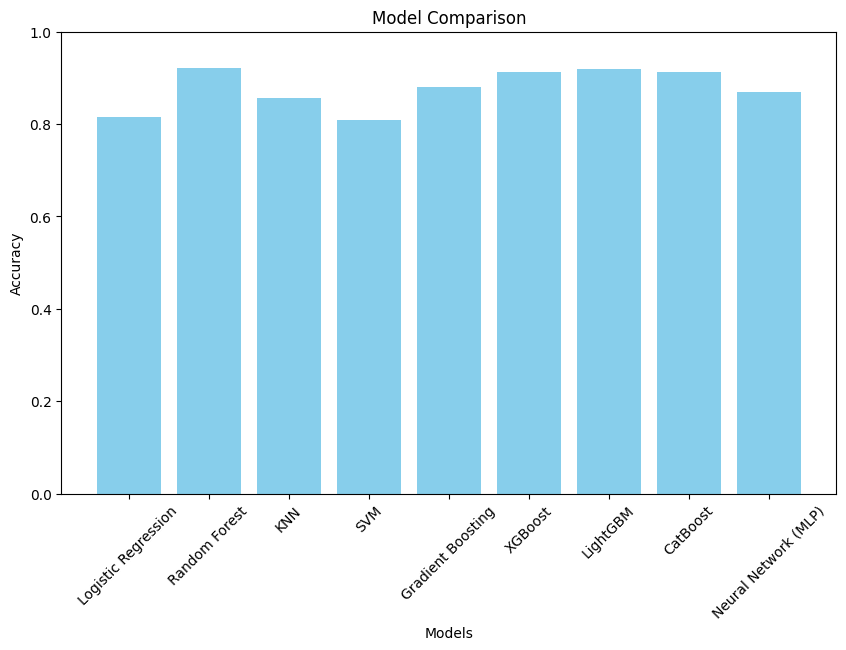

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Test Accuracy'], color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()


# Important Feature

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def normalize_importances(importances):
    scaler = MinMaxScaler()
    return scaler.fit_transform(importances.reshape(-1, 1)).flatten()

normalized_importances = {
    'Logistic Regression': normalize_importances(importance_lr),
    'Random Forest': normalize_importances(importance_rf),
    'KNN': normalize_importances(importance_knn),
    'SVM': normalize_importances(importance_svm),
    'Gradient Boosting': normalize_importances(importance_gb),
    'XGBoost': normalize_importances(importance_xgb),
    'LightGBM': normalize_importances(importance_lgb),
    'CatBoost': normalize_importances(importance_cb),
    'Neural Network (MLP)': normalize_importances(importance_mlp)


}

normalized_importances_df = pd.DataFrame(normalized_importances, index=feature_names)
normalized_importances_df['Mean Importance'] = normalized_importances_df.mean(axis=1)
ranked_features = normalized_importances_df.sort_values(by='Mean Importance', ascending=False)
print(ranked_features[['Mean Importance']])

                                Mean Importance
num_scripts                            0.810688
num_internal_links                     0.790090
num_meta_tags                          0.579804
num_password_fields                    0.555223
num_external_links                     0.447878
num_inputs                             0.338354
num_mailto_links                       0.279393
num_inline_styles                      0.257504
num_js_functions                       0.253352
num_images                             0.240590
num_hidden_fields                      0.211549
num_external_form_actions              0.203081
num_style_tags                         0.169928
num_forms                              0.160771
has_settimeout_js                      0.136437
num_iframes                            0.122063
has_unescape_js                        0.094083
num_refresh_meta                       0.092467
has_escape_js                          0.089590
num_onload_attributes                  0

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

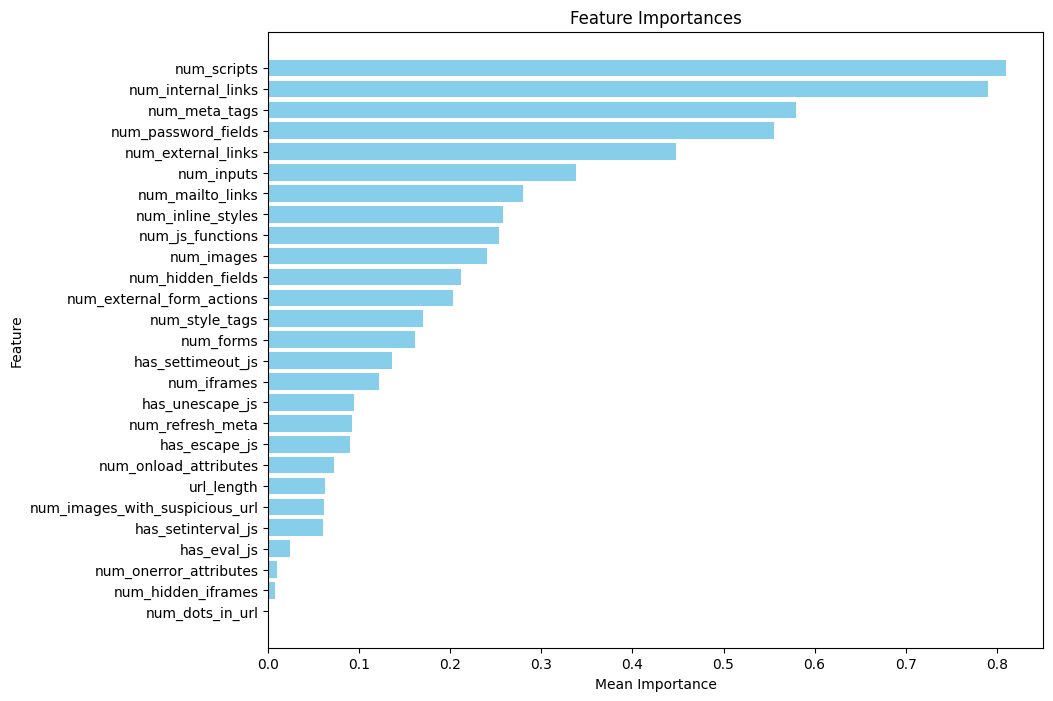

In [ ]:
plt.figure(figsize=(10, 8))
plt.barh(ranked_features.index, ranked_features['Mean Importance'], color='skyblue')
plt.xlabel('Mean Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


#Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.8143405889884763
[[423  74]
 [ 71 213]]
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85       497
         1.0       0.74      0.75      0.75       284

    accuracy                           0.81       781
   macro avg       0.80      0.80      0.80       781
weighted avg       0.81      0.81      0.81       781



In [ ]:
importance_lr = np.abs(logreg.coef_[0])

#Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.912932138284251
[[476  21]
 [ 47 237]]
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93       497
         1.0       0.92      0.83      0.87       284

    accuracy                           0.91       781
   macro avg       0.91      0.90      0.90       781
weighted avg       0.91      0.91      0.91       781



In [ ]:
importance_rf =rf.feature_importances_

# KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8578745198463509
[[450  47]
 [ 64 220]]
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89       497
         1.0       0.82      0.77      0.80       284

    accuracy                           0.86       781
   macro avg       0.85      0.84      0.84       781
weighted avg       0.86      0.86      0.86       781



In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
importance_knn = permutation_importance(knn, X_train, y_train, n_repeats=10, random_state=42).importances_mean

#Support Vector Machine (SVM)

In [ ]:
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8079385403329066
[[413  84]
 [ 66 218]]
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.85       497
         1.0       0.72      0.77      0.74       284

    accuracy                           0.81       781
   macro avg       0.79      0.80      0.80       781
weighted avg       0.81      0.81      0.81       781



In [ ]:
importance_svm = np.abs(svm.coef_[0])

#Gradient Boosting Classifier

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.8796414852752881
[[454  43]
 [ 51 233]]
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.91       497
         1.0       0.84      0.82      0.83       284

    accuracy                           0.88       781
   macro avg       0.87      0.87      0.87       781
weighted avg       0.88      0.88      0.88       781



In [ ]:
importance_gb = gb.feature_importances_

#XGBoost

In [ ]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.912932138284251
[[466  31]
 [ 37 247]]
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       497
         1.0       0.89      0.87      0.88       284

    accuracy                           0.91       781
   macro avg       0.91      0.90      0.91       781
weighted avg       0.91      0.91      0.91       781



In [ ]:
importance_xgb = xgb_model.feature_importances_

#LightGBM

In [ ]:
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
print(confusion_matrix(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))

[LightGBM] [Info] Number of positive: 1070, number of negative: 2054
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1396
[LightGBM] [Info] Number of data points in the train set: 3124, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.342510 -> initscore=-0.652130
[LightGBM] [Info] Start training from score -0.652130
LightGBM Accuracy: 0.9180537772087067
[[469  28]
 [ 36 248]]
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       497
         1.0       0.90      0.87      0.89       284

    accuracy                           0.92       781
   macro avg       0.91      0.91      0.91       781
weighted avg       0.92      0.92      0.92       781



In [ ]:
importance_lgb = lgb_model.feature_importances_

#Catboost

In [ ]:
cat_model = CatBoostClassifier(verbose=0)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))
print(confusion_matrix(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

CatBoost Accuracy: 0.912932138284251
[[469  28]
 [ 40 244]]
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       497
         1.0       0.90      0.86      0.88       284

    accuracy                           0.91       781
   macro avg       0.91      0.90      0.91       781
weighted avg       0.91      0.91      0.91       781



In [ ]:
importance_cb = cat_model.feature_importances_

#Neural Network

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test, y_test)
print("Neural Network Accuracy:", accuracy)

Epoch 1/50
98/98 [==============================] - 2s 4ms/step - loss: 0.5829 - accuracy: 0.6969 - val_loss: 0.5037 - val_accuracy: 0.7836
Epoch 2/50
98/98 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.7878 - val_loss: 0.4390 - val_accuracy: 0.7964
Epoch 3/50
98/98 [==============================] - 0s 3ms/step - loss: 0.4080 - accuracy: 0.7935 - val_loss: 0.4156 - val_accuracy: 0.8118
Epoch 4/50
98/98 [==============================] - 0s 2ms/step - loss: 0.3861 - accuracy: 0.8095 - val_loss: 0.4162 - val_accuracy: 0.8156
Epoch 5/50
98/98 [==============================] - 0s 2ms/step - loss: 0.3725 - accuracy: 0.8166 - val_loss: 0.4128 - val_accuracy: 0.8131
Epoch 6/50
98/98 [==============================] - 0s 3ms/step - loss: 0.3644 - accuracy: 0.8188 - val_loss: 0.4001 - val_accuracy: 0.8169
Epoch 7/50
98/98 [==============================] - 0s 3ms/step - loss: 0.3543 - accuracy: 0.8262 - val_loss: 0.4145 - val_accuracy: 0.8015
Epoch 8/50
98/98 [==

#Results

In [ ]:
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'KNN', 'SVM', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'CatBoost', 'Neural Network'],
    'Accuracy': [accuracy_score(y_test, y_pred_logreg),
                 accuracy_score(y_test, y_pred_rf),
                 accuracy_score(y_test, y_pred_knn),
                 accuracy_score(y_test, y_pred_svm),
                 accuracy_score(y_test, y_pred_gb),
                 accuracy_score(y_test, y_pred_xgb),
                 accuracy_score(y_test, y_pred_lgb),
                 accuracy_score(y_test, y_pred_cat),
                 accuracy]
})

print(results_df)


                 Model  Accuracy
0  Logistic Regression  0.814341
1        Random Forest  0.912932
2                  KNN  0.857875
3                  SVM  0.807939
4    Gradient Boosting  0.879641
5              XGBoost  0.912932
6             LightGBM  0.918054
7             CatBoost  0.912932
8       Neural Network  0.848912


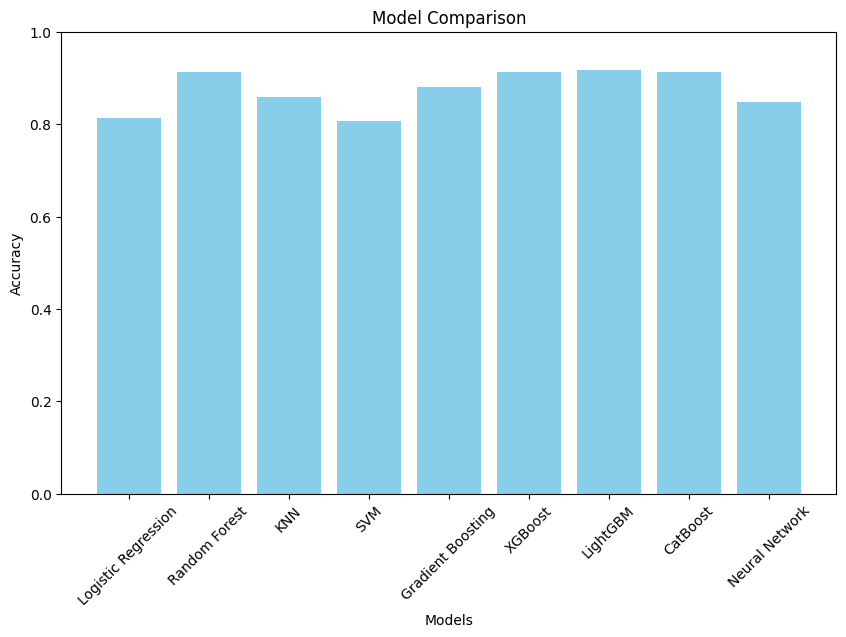

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()


# Important Feature

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def normalize_importances(importances):
    scaler = MinMaxScaler()
    return scaler.fit_transform(importances.reshape(-1, 1)).flatten()

normalized_importances = {
    'Logistic Regression': normalize_importances(importance_lr),
    'Random Forest': normalize_importances(importance_rf),
    'KNN': normalize_importances(importance_knn),
    'SVM': normalize_importances(importance_svm),
    'Gradient Boosting': normalize_importances(importance_gb),
    'XGBoost': normalize_importances(importance_xgb),
    'LightGBM': normalize_importances(importance_lgb),
    'CatBoost': normalize_importances(importance_cb),

}

normalized_importances_df = pd.DataFrame(normalized_importances, index=feature_names)
normalized_importances_df['Mean Importance'] = normalized_importances_df.mean(axis=1)
ranked_features = normalized_importances_df.sort_values(by='Mean Importance', ascending=False)
print(ranked_features[['Mean Importance']])

                                Mean Importance
num_scripts                            0.796302
num_internal_links                     0.755416
num_meta_tags                          0.575632
num_password_fields                    0.543802
num_external_links                     0.478773
num_inputs                             0.292698
num_mailto_links                       0.281291
num_inline_styles                      0.250633
num_js_functions                       0.238205
num_images                             0.236352
num_external_form_actions              0.180798
num_hidden_fields                      0.165775
num_style_tags                         0.157237
num_forms                              0.143606
has_settimeout_js                      0.110457
num_iframes                            0.104603
num_refresh_meta                       0.091785
has_unescape_js                        0.083036
has_escape_js                          0.081262
num_onload_attributes                  0

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

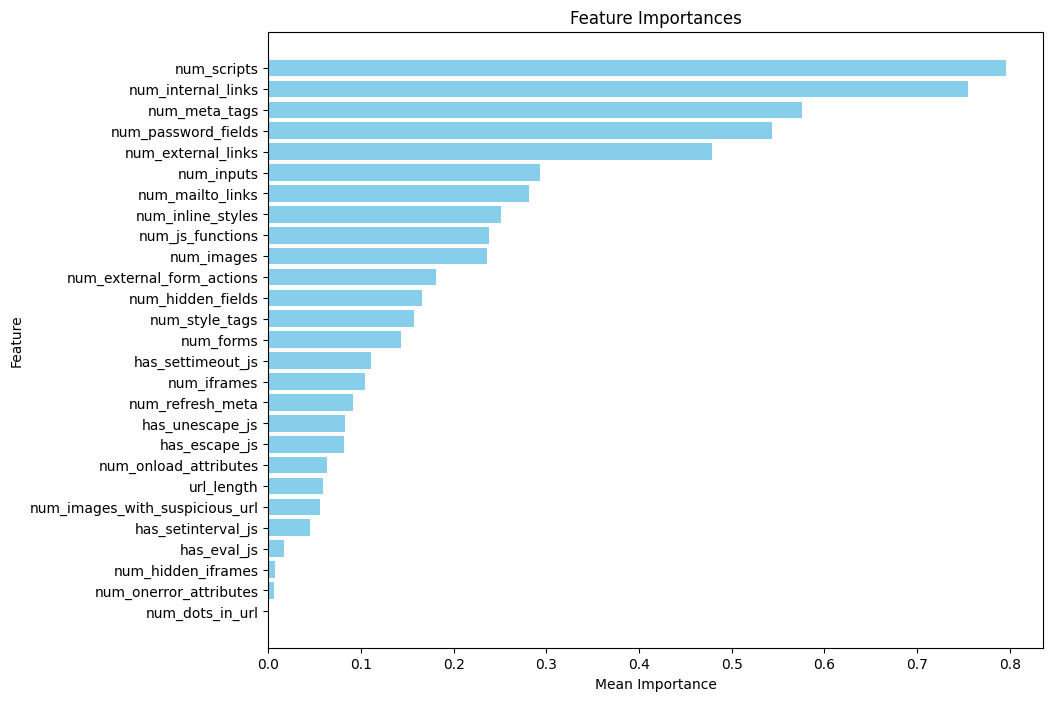

In [ ]:
plt.figure(figsize=(10, 8))
plt.barh(ranked_features.index, ranked_features['Mean Importance'], color='skyblue')
plt.xlabel('Mean Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


#Testing

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from urllib.parse import urlparse

In [ ]:
def extract_features(soup, url):
    parsed_url = urlparse(url)
    filename = parsed_url.path.split('/')[-1] or 'index.html'
    features = {
        'url': url,
        'url_length': len(url),
        'num_dots_in_url': url.count('.'),
        'num_special_chars': len(re.findall(r'[@\-_=&]', url)),
        'num_subdomains': url.count('.') - 1,
        'num_forms': len(soup.find_all('form')),
        'num_inputs': len(soup.find_all('input')),
        'num_password_fields': len(soup.find_all('input', {'type': 'password'})),
        'num_external_links': len([link for link in soup.find_all('a', href=True) if urlparse(link['href']).netloc]),
        'num_internal_links': len([link for link in soup.find_all('a', href=True) if not urlparse(link['href']).netloc]),
        'num_hidden_fields': len(soup.find_all('input', {'type': 'hidden'})),
        'num_mailto_links': len(soup.find_all('a', href=re.compile(r'^mailto:'))),
        'num_scripts': len(soup.find_all('script')),
        'num_js_functions': sum([str(script).count('function') for script in soup.find_all('script')]),
        'has_eval_js': int(any('eval(' in str(script) for script in soup.find_all('script'))),
        'has_escape_js': int(any('escape(' in str(script) for script in soup.find_all('script'))),
        'has_unescape_js': int(any('unescape(' in str(script) for script in soup.find_all('script'))),
        'has_settimeout_js': int(any('setTimeout(' in str(script) for script in soup.find_all('script'))),
        'has_setinterval_js': int(any('setInterval(' in str(script) for script in soup.find_all('script'))),
        'has_https': int(url.startswith('https://')),
        'suspicious_url': int(any(keyword in url.lower() for keyword in ['login', 'bank', 'verify', 'secure', 'account'])),
        'num_meta_tags': len(soup.find_all('meta')),
        'num_refresh_meta': len(soup.find_all('meta', attrs={'http-equiv': 'refresh'})),
        'num_iframes': len(soup.find_all('iframe')),
        'num_hidden_iframes': len([iframe for iframe in soup.find_all('iframe') if iframe.get('style') == 'display:none']),
        'num_images': len(soup.find_all('img')),
        'num_images_with_suspicious_url': len([img for img in soup.find_all('img') if any(keyword in img.get('src', '').lower() for keyword in ['login', 'bank', 'verify', 'secure', 'account'])]),
        'num_style_tags': len(soup.find_all('style')),
        'num_inline_styles': len(soup.find_all(style=True)),
        'num_onload_attributes': len(soup.find_all(attrs={'onload': True})),
        'num_onerror_attributes': len(soup.find_all(attrs={'onerror': True})),
        'num_external_form_actions': len([form for form in soup.find_all('form') if urlparse(form.get('action', '')).netloc])
    }

    return features


In [ ]:
 #https://en.wikipedia.org/wiki/Web_scraping

In [ ]:
url= input("Enter a URL: ")
data = []

try:
  response = requests.get(url)
  response.raise_for_status()
  soup = BeautifulSoup(response.content, 'html.parser')
  features = extract_features(soup, url)
  data.append(features)
  print(f"Processed URL: {url}")

except requests.exceptions.RequestException as e:
  print(f"Error fetching {url}: {e}")

test_df = pd.DataFrame(data)
test_df

Enter a URL: https://en.wikipedia.org/wiki/Web_scraping
Processed URL: https://en.wikipedia.org/wiki/Web_scraping


,url,url_length,num_dots_in_url,num_special_chars,num_subdomains,num_forms,num_inputs,num_password_fields,num_external_links,num_internal_links,...,num_refresh_meta,num_iframes,num_hidden_iframes,num_images,num_images_with_suspicious_url,num_style_tags,num_inline_styles,num_onload_attributes,num_onerror_attributes,num_external_form_actions
0,https://en.wikipedia.org/wiki/Web_scraping,42,2,1,1,1,9,0,100,316,...,0,0,0,8,1,5,9,0,0,0


In [ ]:
colums_not_reqd_test = ['num_special_chars','num_subdomains','has_https','suspicious_url','url']

In [ ]:
test_df_cleaned = test_df.drop(columns=colums_not_reqd_test)
test_df_cleaned.shape

(1, 27)

In [ ]:
text_url = scaler.transform(test_df_cleaned)

In [ ]:
random_forest_prediction = rf.predict(text_url)
print("Random Forest Prediction:", random_forest_prediction)
catboost_prediction = cat_model.predict(text_url)
print("CatBoost Prediction:", catboost_prediction)
xgboost_prediction = xgb_model.predict(text_url)
print("XGBoost Prediction:", xgboost_prediction)
lightgbm_prediction = lgb_model.predict(text_url)
print("LightGBM Prediction:", lightgbm_prediction)


Random Forest Prediction: [0.]
CatBoost Prediction: [0.]
XGBoost Prediction: [0]
LightGBM Prediction: [0.]


#GNN

In [ ]:
!git clone https://github.com/TristanBilot/phishGNN.git
!cd phishGNN

Cloning into 'phishGNN'...
remote: Enumerating objects: 724, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 724 (delta 59), reused 127 (delta 46), pack-reused 570
Receiving objects: 100% (724/724), 34.37 MiB | 19.06 MiB/s, done.
Resolving deltas: 100% (318/318), done.


In [ ]:
!python3 -m venv venv
!./venv/bin/activate
!pip install wheel
!pip install -r requirements.txt
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-1.12.0+cpu.html # for cpu


The virtual environment was not created successfully because ensurepip is not
available.  On Debian/Ubuntu systems, you need to install the python3-venv
package using the following command.

    apt install python3.10-venv

You may need to use sudo with that command.  After installing the python3-venv
package, recreate your virtual environment.

Failing command: /content/venv/bin/python3

/bin/bash: line 1: ./venv/bin/activate: No such file or directory
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
Looking in links: https://data.pyg.org/whl/torch-1.12.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing 

In [ ]:
!./install_dataset.sh

/bin/bash: line 1: ./install_dataset.sh: No such file or directory


In [ ]:
!python phishGNN/training.py

python3: can't open file '/content/phishGNN/training.py': [Errno 2] No such file or directory


In [ ]:
!python phishGNN/training.py --plot-embeddings

python3: can't open file '/content/phishGNN/training.py': [Errno 2] No such file or directory


In [ ]:
!python phishGNN/visualization.py

python3: can't open file '/content/phishGNN/visualization.py': [Errno 2] No such file or directory


#FINAL DATASET

In [ ]:
from google.colab import drive
import os

In [ ]:

drive.mount('/content/drive')

# Path to the shared folder shortcut
shared_folder_path = '/content/drive/My Drive/https://drive.google.com/file/d/1Pqw4crM8jP6sTNwrmmA-ysEkyqVFZPz1/view?usp=drive_link'

# List the contents of the shared folder
print(os.listdir(shared_folder_path))